In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from setup import setup_matplotlib

setup_matplotlib()

np.random.seed(42)

In [3]:
k = 1
s = 1
D = s**2/2
#N_t = 100
max_t = 6
ntau = 3
dx = 0.2
sb = 20*dx

f = 15
N_p = 16_000


x_s = np.arange(-sb,sb+1e-6,dx)
bins = np.arange(-sb-dx/2,sb+dx/2+1e-5,dx)
N_x = len(x_s)

def force(x,*args):
     return -k*x**3

i_zero = np.argmin(x_s**2)

In [4]:
def sim(ntau_t,dt_t,x0, force):
    x = np.empty(100000)
    x[:ntau_t] = 0
    x[ntau_t-1] = x0
    for i in range(ntau_t, len(x)):
        x[i] = x[i-1]+force(x[i-ntau_t])*dt_t
    return x

# Nummerical

In [5]:
det_f = 200
x = np.empty(100000)


def get_con(x0, ntau_t, dt_t ):
    x[:ntau_t] = 0
    x[ntau_t-1] = x0
    for i in range(ntau_t, len(x)):
        x[i] = x[i-1]+force(x[i-ntau_t])*dt_t
    return np.isfinite(x[-1]) and x[-1] < x0

def get_oszi(x0, ntau_t, dt_t ):
    x[:ntau_t] = 0
    x[ntau_t-1] = x0
    for i in range(ntau_t, len(x)):
        x[i] = x[i-1]+force(x[i-ntau_t])*dt_t
    return np.all(x >= 0)


det_ltaus = np.logspace(-2,1,10) #np.arange(0.01,0.21,0.01)
diff_b = []
oszi_b = []


for ltau in det_ltaus:
    x1 = 0.001
    x3 = 60
    
    ntau_t = ntau*det_f
    dt_t = ltau/ntau_t
    
    e1 = get_con(x1, ntau_t, dt_t)
    e3 = get_con(x3, ntau_t, dt_t)
    if not e1 or e3:
        print('Boundarys to small')
    for i in range(10):
        x2 = (x1+x3)/2
        e2 = get_con(x2, ntau_t, dt_t)
        if e2:
            x1 = x2
        else:
            x3 = x2
    diff_b.append((x1+x3)/2)
    
for ltau in det_ltaus:
    x1 = 0.001
    x3 = 60
    
    ntau_t = ntau*det_f
    dt_t = ltau/ntau_t
    
    e1 = get_oszi(x1, ntau_t, dt_t)
    e3 = get_oszi(x3, ntau_t, dt_t)
    if not e1 or e3:
        print('Boundarys to small')
    for i in range(10):
        x2 = (x1+x3)/2
        e2 = get_oszi(x2, ntau_t, dt_t)
        if e2:
            x1 = x2
        else:
            x3 = x2
    oszi_b.append((x1+x3)/2)

/tmp/ipykernel_6521/951007182.py:19: RuntimeWarning: overflow encountered in double_scalars
  return -k*x**3
/tmp/ipykernel_6521/3718311904.py:9: RuntimeWarning: invalid value encountered in double_scalars
  x[i] = x[i-1]+force(x[i-ntau_t])*dt_t
/tmp/ipykernel_6521/3718311904.py:16: RuntimeWarning: invalid value encountered in double_scalars
  x[i] = x[i-1]+force(x[i-ntau_t])*dt_t


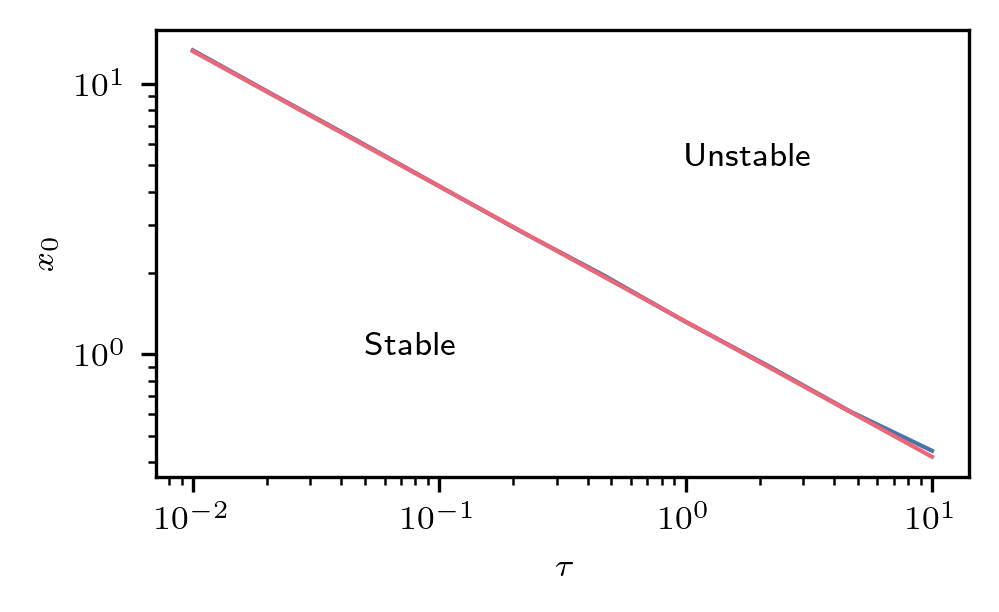

In [15]:
plt.plot(det_ltaus, diff_b)
#plt.plot(det_ltaus, oszi_b)
plt.plot(det_ltaus, np.sqrt(7)/2*det_ltaus**(-1/2))
# plt.plot(det_ltaus,(6/7)*det_ltaus**(-1/2)) # WHy ?? - in both cases pre factor estimated
plt.text(1,5,'Unstable')
plt.text(0.05,1,'Stable')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('$x_0$')
plt.xlabel(r'$\tau$')
plt.tight_layout()
plt.savefig('graphics/x4stability.pdf')

In [7]:
# Analytical

In [8]:
# Something wrong !!

# t,s, x_i,x_0, tau = symbols('t s x_i x_0 tau')

# x_i = x_0
# x = x_i

# func_parts = [x]
# x_is = [x_i]
# max_i = 4
# for i in range(max_i):
#     print(i)
    
#     x = simplify(x_i + integrate(-x**3, (s,0,t)))
#     x_i = x.subs({t:tau})
    
#     func_parts.append(x)
#     x_is.append(x_i)

# my_fs = [lambdify([x_0,tau, t], f) for f in func_parts]
# print(my_fs[0](1/2,0.5, 0.5))

# def all(x_0,tau,t):
#     intv = int(t//tau)
#     t_rest = t%tau
#     return my_fs[intv](x_0,tau,t_rest)
# all = np.vectorize(all)

# ntau = 100
# num_tau = 1.5
# num_x0 = 1.1
# ts = np.linspace(0, max_i*num_tau,1000)

# dt = num_tau/ntau
# x = sim(ntau, dt, num_x0, force)
# sim_ts = np.arange(0, len(x))*dt-num_tau

# print(4/3*num_tau**(-1/2))
# print(6/7*num_tau**(-1/2))

In [9]:
# plt.plot(ts, all(num_x0, num_tau, ts), )
# plt.xlim(*plt.xlim())
# plt.plot(sim_ts, x)
# plt.ylim(-2,2)
# plt.hlines((num_x0, -num_x1), *plt.xlim(), color = 'black')
# plt.vlines(num_tau*np.arange(0,10), *plt.ylim(), color = 'black')

In [10]:
# From tablet ! x4 page 2
def f_3(t, x_0,tau):
    return x_0-tau*x_0**3-x_0**3*t+3/2*x_0**5*t**2-x_0**7*t**3+1/4*x_0**9*t**4

1.0886621079036347
0.6998542122237651


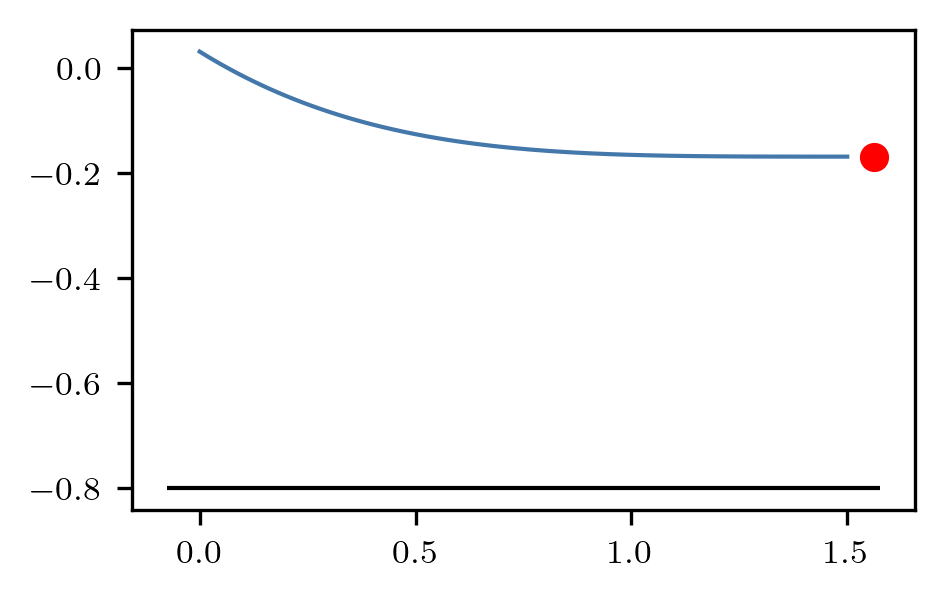

In [11]:
num_tau = 1.5
num_x0 = 0.8

this_ts = np.linspace(0,num_tau,100)
plt.plot(this_ts, f_3(this_ts, num_x0, num_tau))
plt.hlines(-num_x0, *plt.xlim(), color = 'black')

plt.scatter(1/num_x0**2, 3/4*num_x0-num_tau*num_x0**3, color = 'red')
print(4/3*num_tau**(-1/2))
print(6/7*num_tau**(-1/2))

In [12]:
4/3, np.sqrt(7)/2

(1.3333333333333333, 1.3228756555322954)

In [13]:
6/7, np.sqrt(3)/2

(0.8571428571428571, 0.8660254037844386)